In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [2]:
df = pd.read_csv('https://github.com/Nine587403/DataScience2/blob/main/Train%20(1).csv?raw=true')

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6978,FDQ26,13.500,Regular,0.068256,Dairy,60.9562,OUT017,2007,NaN,Tier 2,Supermarket Type1,533.3058
4924,NCZ53,9.600,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,NaN,Tier 3,Grocery Store,376.8428
316,FDA33,6.480,Low Fat,0.033969,Snack Foods,148.0076,OUT045,2002,NaN,Tier 2,Supermarket Type1,886.8456
2668,FDV16,7.750,Regular,0.082915,Frozen Foods,34.9558,OUT035,2004,Small,Tier 2,Supermarket Type1,645.1602
4631,FDQ11,NaN,Regular,0.067373,Breads,258.8988,OUT027,1985,Medium,Tier 3,Supermarket Type3,3083.9856
6354,DRG03,14.500,Low Fat,0.103753,Dairy,155.1998,OUT010,1998,NaN,Tier 3,Grocery Store,307.5996
1333,FDH19,19.350,Low Fat,0.033061,Meat,172.4738,OUT013,1987,High,Tier 3,Supermarket Type1,1911.5118
3841,FDV12,16.700,Regular,0.060824,Baking Goods,98.7384,OUT013,1987,High,Tier 3,Supermarket Type1,1773.6912
4323,DRD37,9.800,Low Fat,0.013870,Soft Drinks,47.4060,OUT045,2002,NaN,Tier 2,Supermarket Type1,978.7260
7396,NCF06,6.235,Low Fat,0.033808,Household,258.9962,OUT010,1998,NaN,Tier 3,Grocery Store,258.9962


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


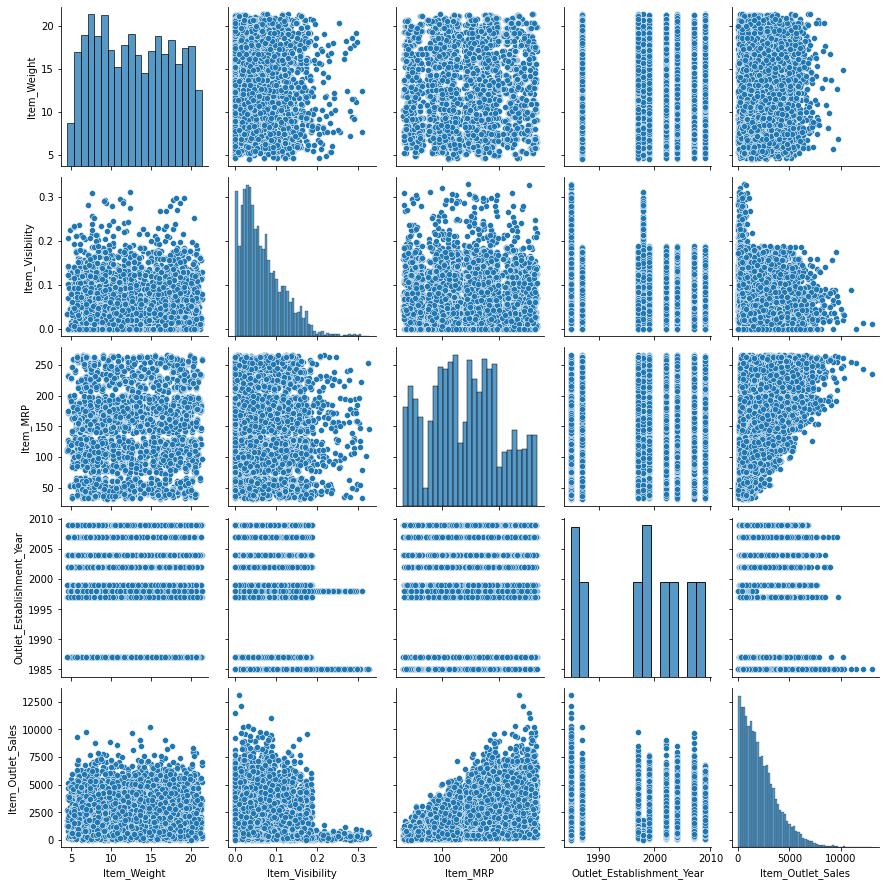

In [8]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

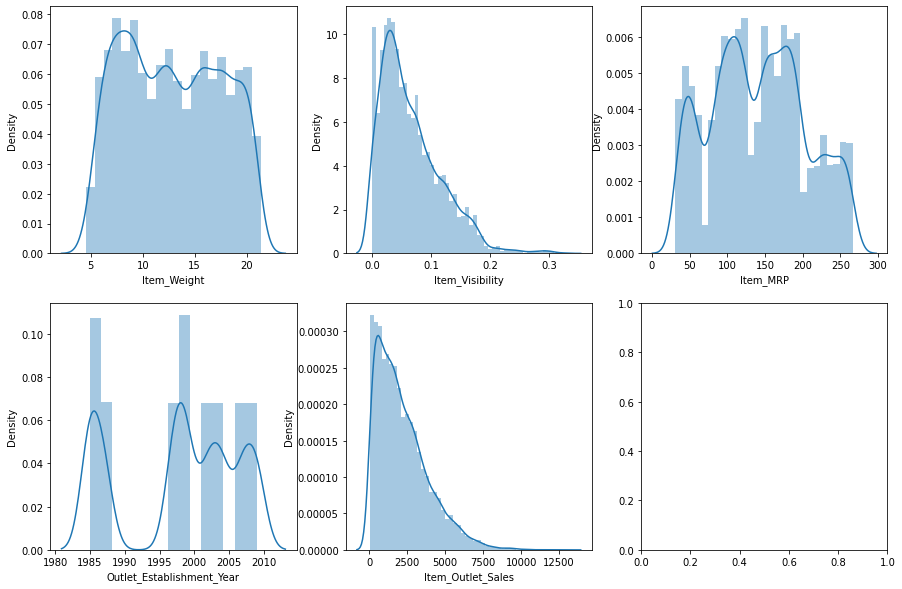

In [9]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
f, axes = plt.subplots(2, 3, figsize=(15, 10))
axes=axes.ravel()
for i,col in enumerate(cols):
    plot=sns.distplot(df[col], ax=axes[i])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

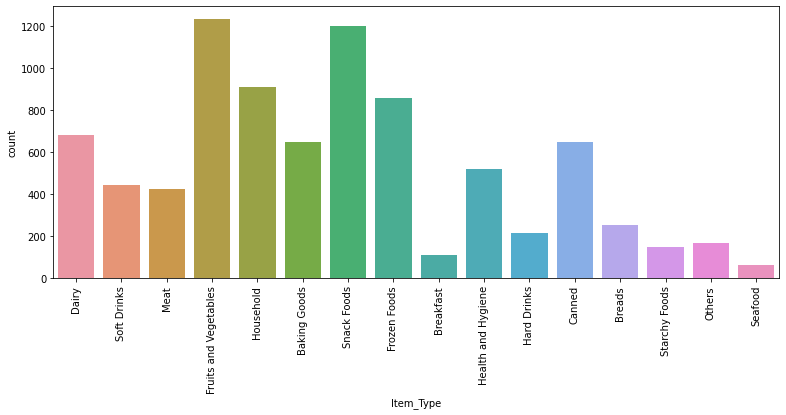

In [10]:
plt.figure(figsize=(13,5))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

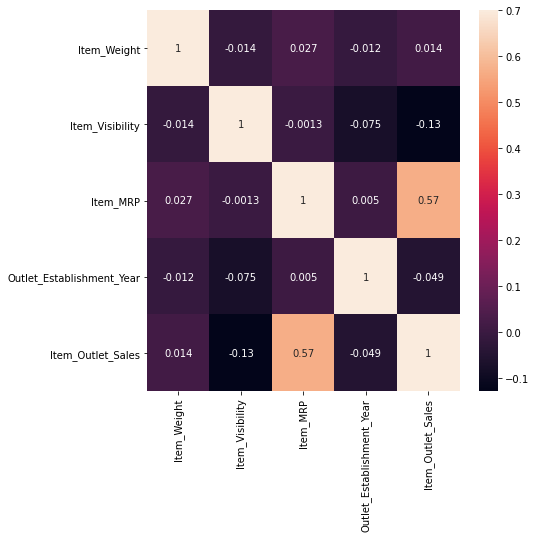

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, vmax=0.7)

In [12]:

df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


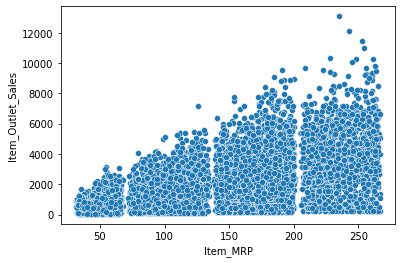

In [13]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)

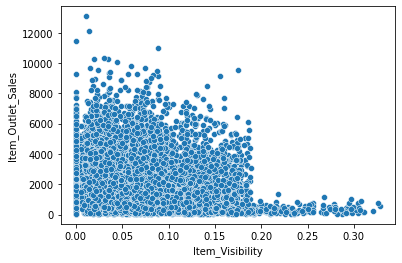

In [14]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)

In [15]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Low Fat',inplace=True)

In [19]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [21]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



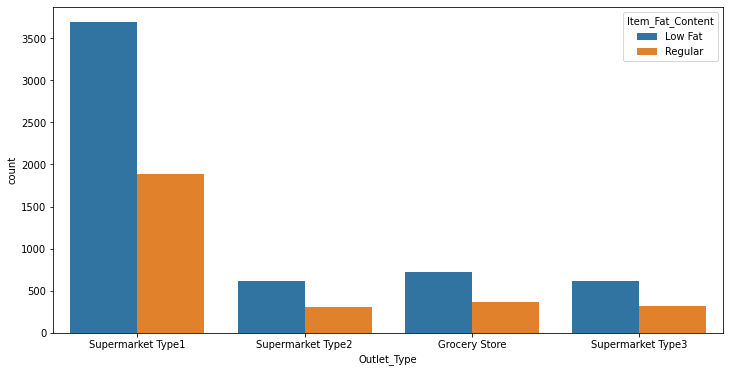

In [24]:
plt.figure(figsize=(12,6))
sns.countplot('Outlet_Type', hue='Item_Fat_Content', data=df)

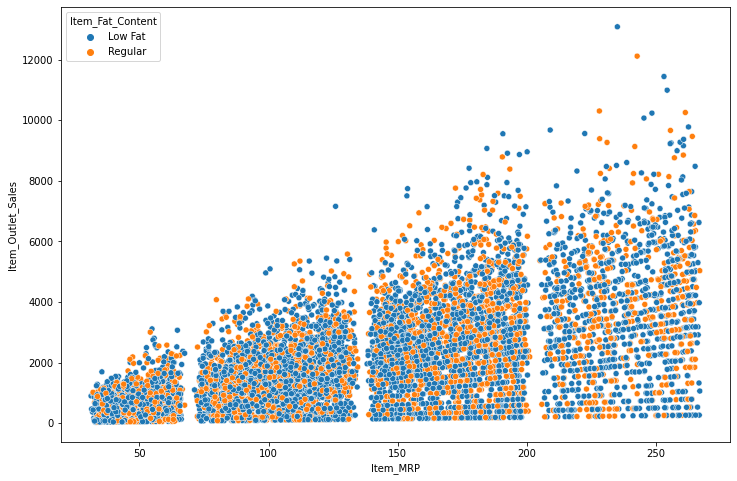

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, hue='Item_Fat_Content')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

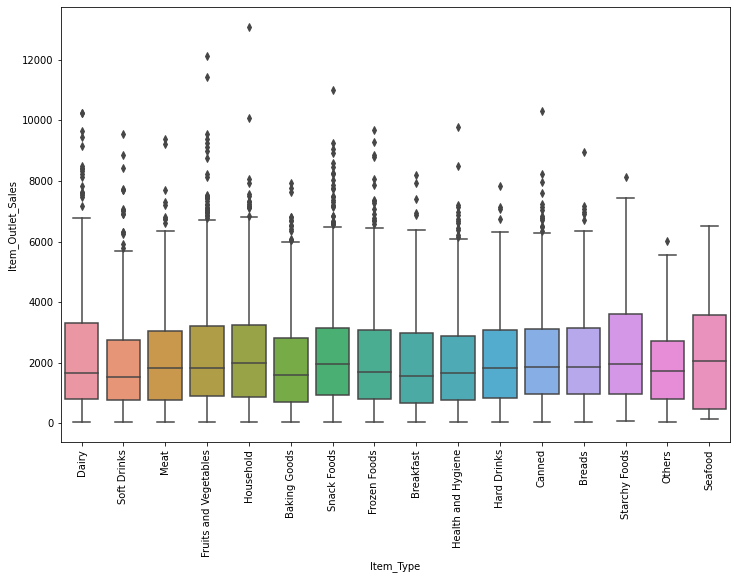

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df )
plt.xticks(rotation=90)

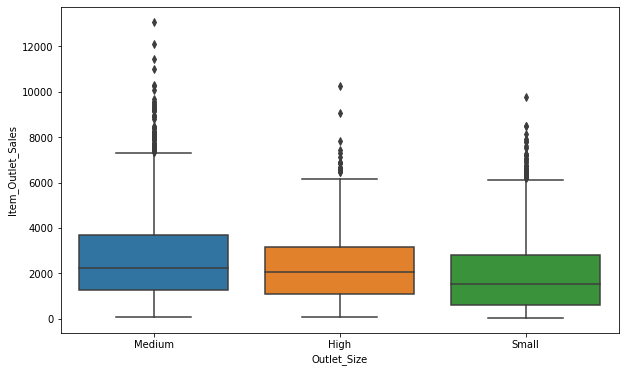

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df )

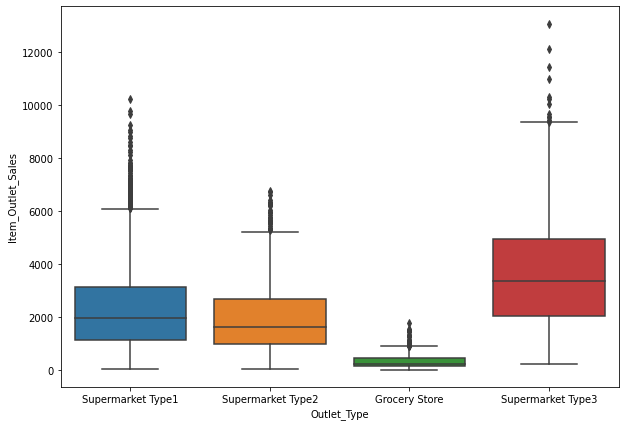

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df )

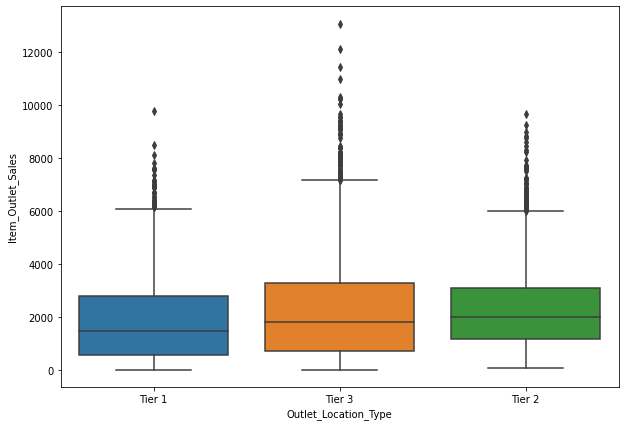

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

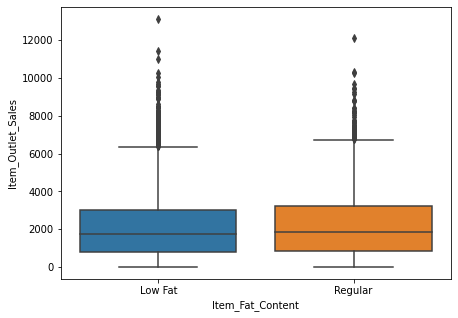

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

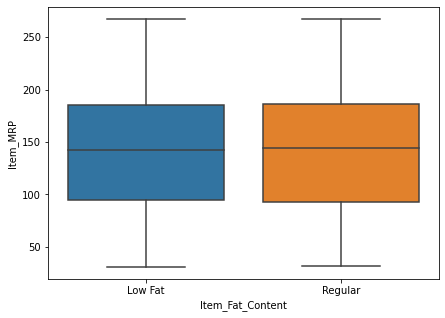

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df)

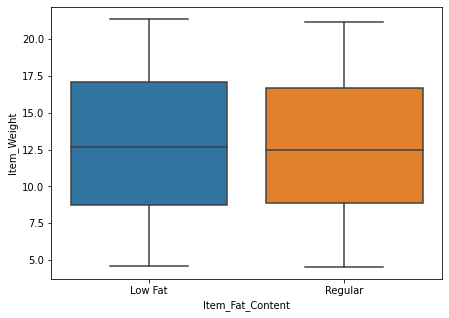

In [32]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)

In [33]:
sumItem_Type = df.groupby('Item_Type').sum()
px.pie(sumItem_Type, values=sumItem_Type['Item_Outlet_Sales'], 
                    names=sumItem_Type.index, title='Item_Type_Sale')

In [34]:
pd.DataFrame(df.groupby('Item_Identifier').mean()['Item_MRP'])

,Item_MRP
Item_Identifier,
DRA12,141.865400
DRA24,164.086800
DRA59,185.179900
DRB01,189.586333
DRB13,189.693000
...,...
NCZ30,120.752657
NCZ41,125.630400
NCZ42,236.644800


In [35]:
df1 = df.dropna().head(10)
px.scatter(df1, x=df1['Item_Identifier'], 
                        y=df1['Item_Outlet_Sales'],
                        size=df1['Item_Weight'],
                        color='Item_Visibility')

In [36]:
df[df['Outlet_Type'] == 'Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [37]:
df.groupby('Outlet_Type').get_group('Grocery Store')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [38]:
df[(df['Outlet_Size'] == 'Small') & (df['Item_Type'] == 'Soft Drinks')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
34,DRH01,17.500,Low Fat,0.097904,Soft Drinks,174.8738,OUT046,1997,Small,Tier 1,Supermarket Type1,2085.2856
108,DRE60,NaN,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
126,DRI49,14.150,Low Fat,0.183507,Soft Drinks,82.4276,OUT046,1997,Small,Tier 1,Supermarket Type1,1137.1864
163,DRF49,7.270,Low Fat,0.071078,Soft Drinks,114.2518,OUT046,1997,Small,Tier 1,Supermarket Type1,2618.5914
178,DRY23,NaN,Regular,0.191014,Soft Drinks,42.1112,OUT019,1985,Small,Tier 1,Grocery Store,42.6112
...,...,...,...,...,...,...,...,...,...,...,...,...
8071,DRD25,6.135,Low Fat,0.000000,Soft Drinks,114.2860,OUT046,1997,Small,Tier 1,Supermarket Type1,2376.9060
8276,DRH13,8.575,Low Fat,0.023886,Soft Drinks,106.6280,OUT046,1997,Small,Tier 1,Supermarket Type1,958.7520
8325,DRK49,14.150,Low Fat,0.035937,Soft Drinks,41.0138,OUT035,2004,Small,Tier 2,Supermarket Type1,771.6622
8434,DRJ13,12.650,Low Fat,0.062878,Soft Drinks,160.9578,OUT035,2004,Small,Tier 2,Supermarket Type1,4332.3606


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 741.3+ KB


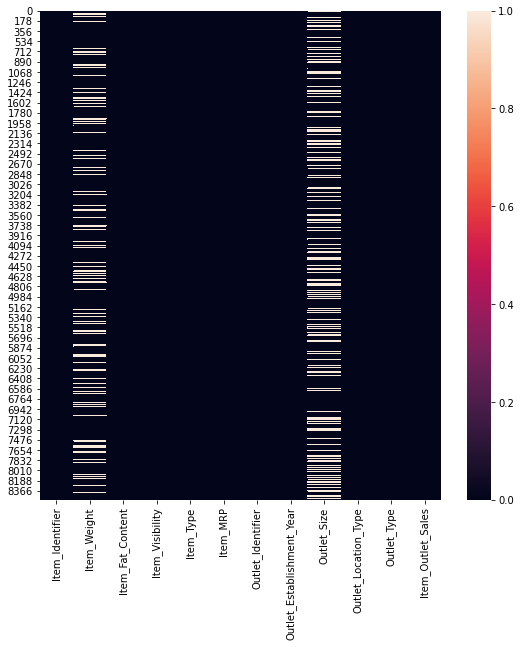

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(df.isnull())

In [43]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [44]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
df_droped = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [46]:
salemax = df_droped['Item_Outlet_Sales'].max()
df_droped[df_droped['Item_Outlet_Sales'] == salemax]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,12.857645,Low Fat,0.010551,Household,234.9958,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [47]:
salemin = df_droped['Item_Outlet_Sales'].min()
df_droped[df_droped['Item_Outlet_Sales'] == salemin]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,9.500,Low Fat,0.000000,Soft Drinks,32.89,1998,Medium,Tier 3,Grocery Store,33.29
6950,9.105,Low Fat,0.064411,Household,33.39,1998,Medium,Tier 3,Grocery Store,33.29


In [48]:
df_dummies = pd.get_dummies(df_droped, drop_first=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('Item_Outlet_Sales', axis=1), df_dummies['Item_Outlet_Sales'], test_size=0.2, random_state=69)

In [50]:
X_train_MRP = np.array(X_train['Item_MRP']).reshape(-1,1)
X_test_MRP = np.array(X_test['Item_MRP']).reshape(-1,1)

In [51]:
lr = LinearRegression()
lr.fit(X_train_MRP, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(lr.intercept_)
print(lr.coef_)

-31.60086547411447
[15.72553155]


In [53]:
lr_pred = lr.predict(X_test_MRP)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, lr_pred))

MAE: 1007.4941116859005
MSE: 1898804.869099244
RMSE: 1377.9712874727268
R-SQUARE: 0.31109593243001255


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



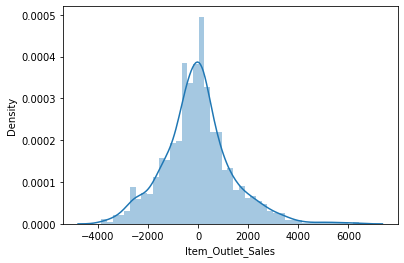

In [55]:
diff_single_lr = (y_test - lr_pred)
sns.distplot(diff_single_lr)

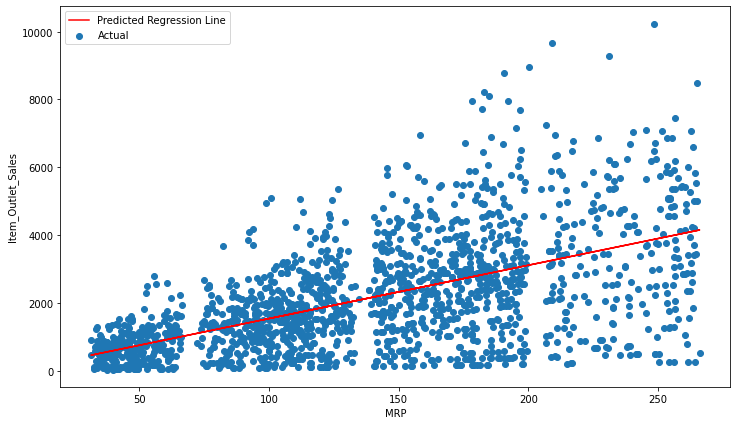

In [56]:
plt.figure(figsize=(12,7))
plt.scatter(X_test_MRP, y_test, label='Actual')
plt.plot(X_test_MRP, lr_pred, label='Predicted Regression Line', color='red')
plt.xlabel('MRP')
plt.ylabel('Item_Outlet_Sales')
plt.legend()

In [57]:
sc_X_train_MRP_scale = StandardScaler()
sc_X_test_MRP_scale = StandardScaler()
sc_y_train_scale = StandardScaler()

X_std_MRP_train = sc_X_train_MRP_scale.fit_transform(X_train_MRP)
X_std_MRP_test = sc_X_test_MRP_scale.fit_transform(X_test_MRP)
y_train_1D = np.array(y_train).reshape(-1,1)
y_std_MRP_train = sc_y_train_scale.fit_transform(y_train_1D)

In [58]:
svr = SVR(kernel='rbf')
svr.fit(X_std_MRP_train, y_std_MRP_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
svr_pred = svr.predict(X_std_MRP_test)
svr_pred = sc_y_train_scale.inverse_transform(svr_pred)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, svr_pred))

MAE: 1006.0344284306883
MSE: 1900091.4805499583
RMSE: 1378.4380582927758
R-SQUARE: 0.3106291378287328


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



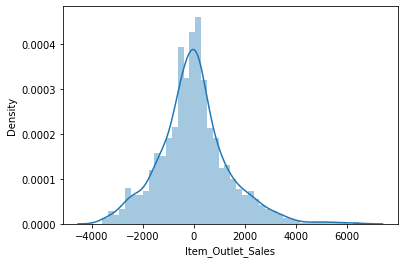

In [61]:
diff_single_svr = (y_test - svr_pred)
sns.distplot(diff_single_svr)

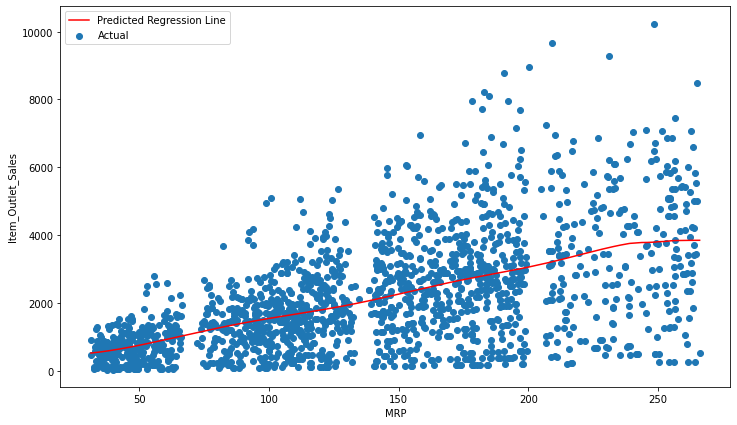

In [62]:
plt.figure(figsize=(12,7))
plt.scatter(X_test_MRP, y_test, label='Actual')
plt.plot(sorted(X_test_MRP), sorted(svr_pred), label='Predicted Regression Line', color='red')
plt.xlabel('MRP')
plt.ylabel('Item_Outlet_Sales')
plt.legend()

In [63]:
m_lr = LinearRegression()
m_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(m_lr.intercept_)
print(m_lr.coef_)

-1494.611533321327
[-6.54406619e-01 -2.79254817e+02  1.57399833e+01  5.45439781e+01
 -4.23331264e+01 -4.74750731e+01 -6.09023575e+00 -9.05862353e+01
 -5.61978474e+01 -1.41481562e+01 -4.47761428e+01 -5.79044074e+01
 -5.33579379e+01 -2.10743540e+01 -5.33865455e+01  1.48235088e+02
 -2.97509329e+01 -6.48689449e+01  6.21347680e+01 -1.06428940e+02
  7.95074758e+02 -1.39497642e+03  1.47281845e+02 -2.80510483e+02
  6.89500644e+02 -1.40396774e+02  1.30542666e+02  4.39173341e+02
 -3.32744401e+02  2.68593387e+02  6.06369812e+02  1.10452105e+03
  1.30542666e+02  1.97723250e+03]


In [65]:
m_lr_pred = m_lr.predict(X_test)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, m_lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_lr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_lr_pred))

MAE: 824.7407173999206
MSE: 1210387.728319413
RMSE: 1100.176226029
R-SQUARE: 0.5608600741730778


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



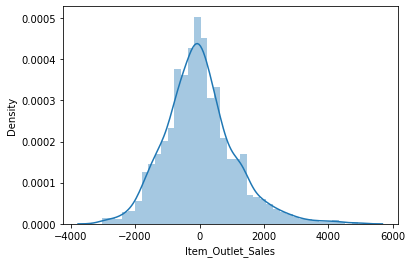

In [67]:
sns.distplot(y_test-m_lr_pred)

In [68]:
compdata = {'Actual' : y_test, 'Predicted' : m_lr_pred}

In [69]:
comp = pd.DataFrame(compdata)
comp

,Actual,Predicted
7562,7717.9536,4418.853565
4486,782.9808,1660.921405
2902,2566.6590,2868.562281
6043,677.1186,3415.358041
3324,4578.0408,3973.857567
...,...,...
7571,1052.6298,1092.586577
7384,2173.1712,2609.870097
4101,575.2512,1034.115932
4966,1508.0370,1756.136967


In [70]:
comp.corr()

,Actual,Predicted
Actual,1.00000,0.74977
Predicted,0.74977,1.00000


In [71]:
m_svr = SVR(kernel='rbf')
m_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
m_svr_pred = m_svr.predict(X_test)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, m_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_svr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_svr_pred))

MAE: 1090.9234172439208
MSE: 2215686.6560255806
RMSE: 1488.5182753414822
R-SQUARE: 0.19612827276946132


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



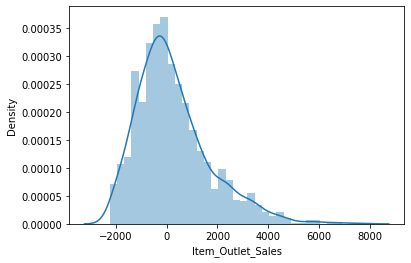

In [74]:
sns.distplot(y_test-m_svr_pred)

In [75]:
compdata1 = {'Actual' : y_test, 'Predicted': m_svr_pred}
comp1 = pd.DataFrame(compdata1)
comp1

,Actual,Predicted
7562,7717.9536,2241.367835
4486,782.9808,1548.830956
2902,2566.6590,2166.875170
6043,677.1186,2451.328410
3324,4578.0408,2487.722949
...,...,...
7571,1052.6298,1299.776976
7384,2173.1712,2224.503990
4101,575.2512,2296.131583
4966,1508.0370,1573.477031


In [76]:
comp1.corr()

,Actual,Predicted
Actual,1.000000,0.557766
Predicted,0.557766,1.000000


In [77]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [78]:
dt_pred = dt.predict(X_test)

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, dt_pred))

MAE: 1039.453988973607
MSE: 2218644.091000437
RMSE: 1489.5113598091277
R-SQUARE: 0.19505528785304993


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



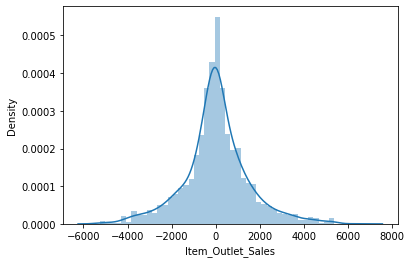

In [81]:
sns.distplot(y_test-dt_pred)

In [82]:
compdata2 = {'Actual' : y_test, 'Predicted' : dt_pred}
comp2 = pd.DataFrame(compdata2)
comp2

,Actual,Predicted
7562,7717.9536,3747.1224
4486,782.9808,489.3630
2902,2566.6590,2897.5616
6043,677.1186,2687.8346
3324,4578.0408,9664.7528
...,...,...
7571,1052.6298,495.3552
7384,2173.1712,2706.4770
4101,575.2512,196.4110
4966,1508.0370,1105.8938


In [83]:
comp2.corr()

,Actual,Predicted
Actual,1.000000,0.590753
Predicted,0.590753,1.000000


In [84]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
rf_pred = rf.predict(X_test)

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, rf_pred))

MAE: 766.2919313947214
MSE: 1190612.6649230246
RMSE: 1091.1519898359827
R-SQUARE: 0.568034651104034


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



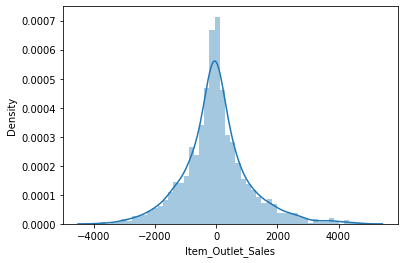

In [87]:
sns.distplot(y_test-rf_pred)

In [88]:
compdata3 = {'Actual' : y_test, 'Predicted' : rf_pred}
comp3 = pd.DataFrame(compdata3)
comp3

,Actual,Predicted
7562,7717.9536,3840.001500
4486,782.9808,1286.239046
2902,2566.6590,3551.037642
6043,677.1186,3418.916290
3324,4578.0408,4539.897118
...,...,...
7571,1052.6298,1092.018528
7384,2173.1712,2765.726542
4101,575.2512,539.644216
4966,1508.0370,1573.245452


In [89]:
comp3.corr()

,Actual,Predicted
Actual,1.000000,0.755234
Predicted,0.755234,1.000000


In [90]:
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
sc_y_train = StandardScaler()

X_std_train = sc_X_train.fit_transform(X_train)
X_std_test = sc_X_test.fit_transform(X_test)
y_std_train = sc_y_train.fit_transform(y_train_1D)

In [91]:
m_std_lr = LinearRegression()
m_std_lr.fit(X_std_train, y_std_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
m_std_lr_pred = m_std_lr.predict(X_std_test)
m_std_lr_pred = sc_y_train.inverse_transform(m_std_lr_pred)

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_lr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_lr_pred))

MAE: 5402249369680.428
MSE: 4.808921072372326e+25
RMSE: 6934638471018.028
R-SQUARE: -1.7447212935323308e+19


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



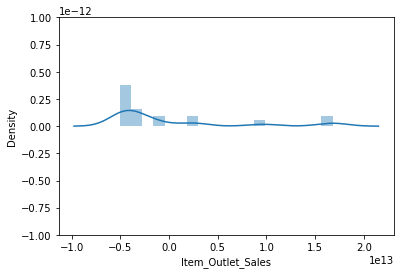

In [94]:
sns.distplot(y_test-m_std_lr_pred.reshape(-1,))

In [95]:
compdata4 = {'Actual' : y_test, 'Predicted' : m_std_lr_pred.reshape(-1,)}
comp4 = pd.DataFrame(compdata4)
comp4

,Actual,Predicted
7562,7717.9536,4.588427e+12
4486,782.9808,5.052724e+12
2902,2566.6590,1.394013e+12
6043,677.1186,4.225679e+12
3324,4578.0408,3.296007e+12
...,...,...
7571,1052.6298,-1.678964e+13
7384,2173.1712,4.225679e+12
4101,575.2512,2.853315e+12
4966,1508.0370,1.394013e+12


In [96]:
comp4.corr()

,Actual,Predicted
Actual,1.000000,0.094548
Predicted,0.094548,1.000000


In [97]:
m_std_svr = SVR(kernel='rbf')
m_std_svr.fit(X_std_train, y_std_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [98]:
m_std_svr_pred = m_std_svr.predict(X_std_test)
m_std_svr_pred = sc_y_train.inverse_transform(m_std_svr_pred)

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_svr_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_svr_pred))

MAE: 749.2689413778903
MSE: 1143093.1874059758
RMSE: 1069.155361678543
R-SQUARE: 0.5852751595328042


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



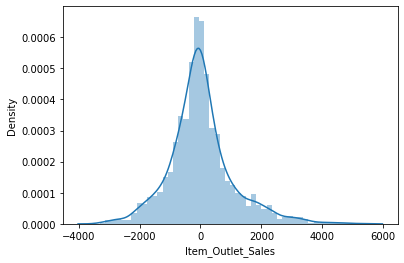

In [100]:
sns.distplot(y_test-m_std_svr_pred)

In [101]:
compdata5 = {'Actual' : y_test, 'Predicted' : m_std_svr_pred}
comp5 = pd.DataFrame(compdata5)
comp5

,Actual,Predicted
7562,7717.9536,4668.120445
4486,782.9808,2031.010372
2902,2566.6590,2988.505174
6043,677.1186,3438.887775
3324,4578.0408,3748.163248
...,...,...
7571,1052.6298,1287.287976
7384,2173.1712,2341.176160
4101,575.2512,440.462498
4966,1508.0370,1691.945351


In [102]:
comp5.corr()

,Actual,Predicted
Actual,1.000000,0.765362
Predicted,0.765362,1.000000


In [103]:
m_std_dt = DecisionTreeRegressor()
m_std_dt.fit(X_std_train, y_std_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [104]:
m_std_dt_pred = m_std_dt.predict(X_test)
m_std_dt_pred = sc_y_train.inverse_transform(m_std_dt_pred)

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_dt_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_dt_pred))

MAE: 3766.6235062756596
MSE: 17213712.119538378
RMSE: 4148.9410841247645
R-SQUARE: -5.245294864213333


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



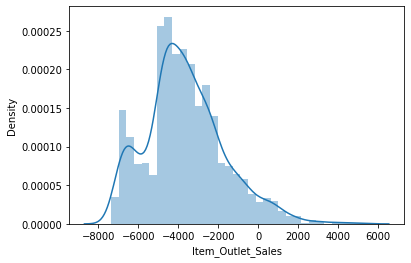

In [106]:
sns.distplot(y_test-m_std_dt_pred)

In [107]:
compdata6 = {'Actual' : y_test, 'Predicted' : m_std_dt_pred}
comp6 = pd.DataFrame(compdata6)
comp6

,Actual,Predicted
7562,7717.9536,5034.7796
4486,782.9808,5206.5560
2902,2566.6590,5206.5560
6043,677.1186,5034.7796
3324,4578.0408,7588.1226
...,...,...
7571,1052.6298,5206.5560
7384,2173.1712,5034.7796
4101,575.2512,7028.8506
4966,1508.0370,5206.5560


In [108]:
comp6.corr()

,Actual,Predicted
Actual,1.00000,-0.03483
Predicted,-0.03483,1.00000


In [109]:
m_std_rf = RandomForestRegressor()
m_std_rf.fit(X_std_train, y_std_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
m_std_rf_pred = m_std_rf.predict(X_test)
m_std_rf_pred = sc_y_train.inverse_transform(m_std_rf_pred)

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, m_std_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_std_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_std_rf_pred)))
print('R-SQUARE:', metrics.r2_score(y_test, m_std_rf_pred))

MAE: 2677.258962510265
MSE: 8763344.137587348
RMSE: 2960.2946031750535
R-SQUARE: -2.17942276225751


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



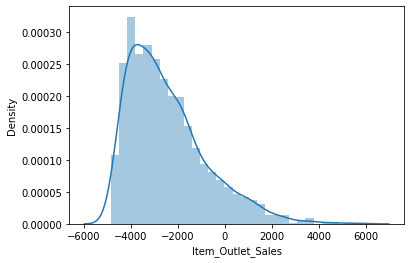

In [112]:
sns.distplot(y_test-m_std_rf_pred)

In [113]:
compdata7 = {'Actual' : y_test, 'Predicted' : m_std_rf_pred}
comp7 = pd.DataFrame(compdata7)
comp7

,Actual,Predicted
7562,7717.9536,4553.645888
4486,782.9808,4744.477484
2902,2566.6590,4812.535560
6043,677.1186,4540.762658
3324,4578.0408,4559.385084
...,...,...
7571,1052.6298,4487.784952
7384,2173.1712,4411.703986
4101,575.2512,4787.028762
4966,1508.0370,4809.879018


In [117]:
comp7.corr()

,Actual,Predicted
Actual,1.000000,-0.032336
Predicted,-0.032336,1.000000


In [119]:
RMSE_data = {'Models' : ['Linear Regression', 'SupportVectors', 'DecisionTree', 'RandomForest',
             'Linear Regression Std', 'SupportVectors Std', 'DecisionTree Std', 'RandomForest Std'],
             'RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, m_lr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_svr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, dt_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, rf_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_lr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_svr_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_dt_pred)),
                    np.sqrt(metrics.mean_squared_error(y_test, m_std_rf_pred))
                   ]}
RMSE = pd.DataFrame(RMSE_data)

In [120]:
RMSE

,Models,RMSE
0,Linear Regression,1.100176e+03
1,SupportVectors,1.488518e+03
2,DecisionTree,1.489511e+03
3,RandomForest,1.091152e+03
4,Linear Regression Std,6.934638e+12
5,SupportVectors Std,1.069155e+03
6,DecisionTree Std,4.148941e+03
7,RandomForest Std,2.960295e+03


(0.0, 4700.0)

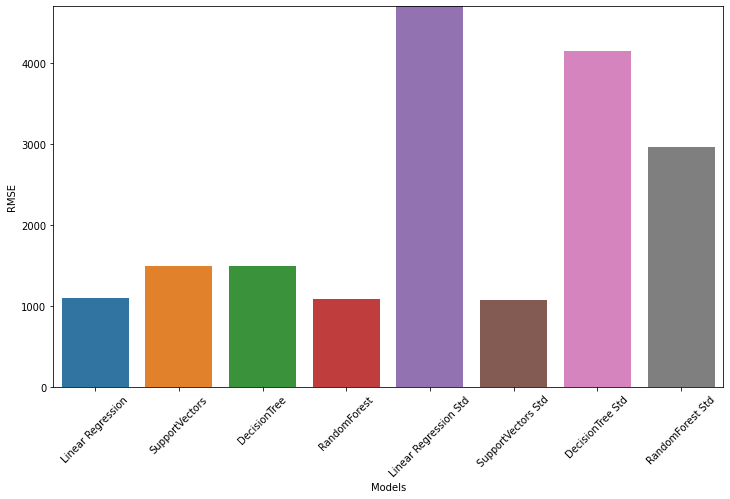

In [121]:
plt.figure(figsize=(12,7))
sns.barplot(x='Models', y='RMSE', data=RMSE)
plt.xticks(rotation=45)
plt.ylim(0,4.7e+03)

In [122]:
R2_data = {'Models' : ['Linear Regression', 'SupportVectors', 'DecisionTree', 'RandomForest',
             'Linear Regression Std', 'SupportVectors Std', 'DecisionTree Std', 'RandomForest Std'],
             'R-SQUARE' : [ metrics.r2_score(y_test, m_lr_pred),
                    metrics.r2_score(y_test, m_svr_pred),
                    metrics.r2_score(y_test, dt_pred),
                    metrics.r2_score(y_test, rf_pred),
                    metrics.r2_score(y_test, m_std_lr_pred),
                    metrics.r2_score(y_test, m_std_svr_pred),
                    metrics.r2_score(y_test, m_std_dt_pred),
                    metrics.r2_score(y_test, m_std_rf_pred)
                   ]}
R2 = pd.DataFrame(R2_data)

In [123]:
R2

,Models,R-SQUARE
0,Linear Regression,5.608601e-01
1,SupportVectors,1.961283e-01
2,DecisionTree,1.950553e-01
3,RandomForest,5.680347e-01
4,Linear Regression Std,-1.744721e+19
5,SupportVectors Std,5.852752e-01
6,DecisionTree Std,-5.245295e+00
7,RandomForest Std,-2.179423e+00


(-7.0, 6.0)

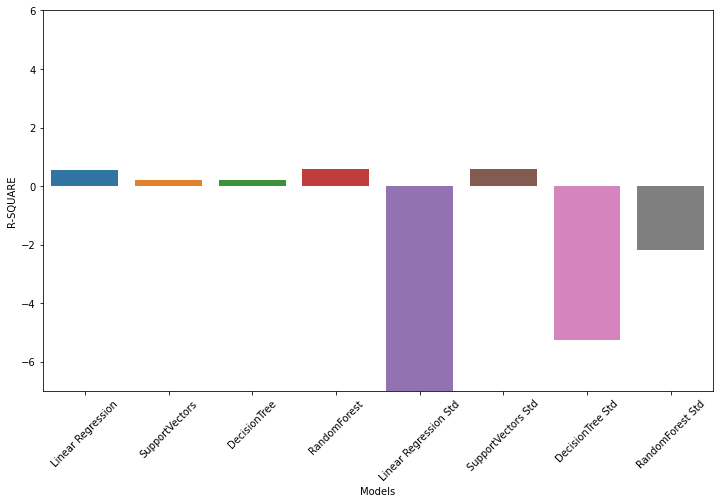

In [124]:
plt.figure(figsize=(12,7))
sns.barplot(x='Models', y='R-SQUARE', data=R2)
plt.xticks(rotation=45)
plt.ylim(-7, 6)